In [60]:
!pip install pandas numpy matplotlib seaborn geopy folium


Defaulting to user installation because normal site-packages is not writeable


In [30]:
import pandas as pd

data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')

data1.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [33]:
data1['rate'] = data1['rate'].replace(['-', 'NEW'], pd.NA)
data1['rate'] = data1['rate'].astype(str).str.replace('/5', '').str.strip()
data1['rate'] = pd.to_numeric(data1['rate'], errors='coerce')
data1['rate'] = data1['rate'].fillna(data1['rate'].median())

In [34]:
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype(str).str.replace(',', '')
data1['approx_costfor_two_people'] = pd.to_numeric(data1['approx_costfor_two_people'], errors='coerce')
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].fillna(data1['approx_costfor_two_people'].median())


In [35]:
data1['dish_liked'] = data1['dish_liked'].fillna("Not Available")
data1['cuisines'] = data1['cuisines'].fillna("Other")
data1['rest_type'] = data1['rest_type'].fillna("Unknown")
data1['votes'] = data1['votes'].fillna(data1['votes'].median()).astype(int)


In [44]:
data1['votes'] = data1['votes'].fillna(data1['votes'].median())
data1['votes'] = data1['votes'].astype(int)

In [57]:
data1['online_order'] = data1['online_order'].map({'Yes': 1, 'No': 0})
data1['book_table'] = data1['book_table'].map({'Yes': 1, 'No': 0})


In [58]:
data1.info()
data1.isnull().sum()
data1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               0 non-null      float64
 1   book_table                 0 non-null      float64
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  float64
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(4), int32(1), object(5)
memory usage: 3.7+ MB


,online_order,book_table,rate,votes,approx_costfor_two_people
count,0.0,0.0,51717.000000,51717.000000,51717.000000
mean,NaN,NaN,3.700362,283.697527,554.391689
std,NaN,NaN,0.395391,803.838853,437.563723
min,NaN,NaN,1.800000,0.000000,40.000000
25%,NaN,NaN,3.500000,7.000000,300.000000
50%,NaN,NaN,3.700000,41.000000,400.000000
75%,NaN,NaN,3.900000,198.000000,650.000000
max,NaN,NaN,4.900000,16832.000000,6000.000000


In [46]:
merged_df = pd.merge(data1, data2, on='listed_incity', how='left')
merged_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity,Latitude,Longitude
0,NaN,NaN,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,12.939333,77.553982
1,NaN,NaN,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,12.939333,77.553982
2,NaN,NaN,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,12.939333,77.553982
3,NaN,NaN,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,12.939333,77.553982
4,NaN,NaN,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,12.939333,77.553982


In [47]:
merged_df[['listed_incity', 'Latitude', 'Longitude']].isnull().sum()

listed_incity       0
Latitude         5580
Longitude        5580
dtype: int64

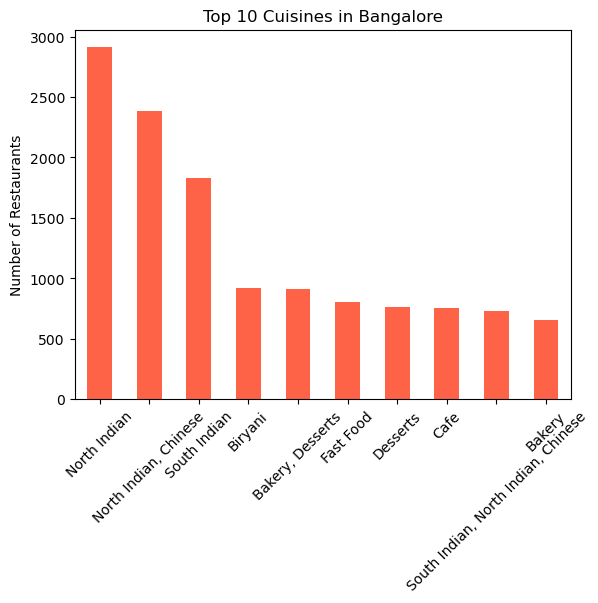

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_df['cuisines'].value_counts().head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Cuisines in Bangalore')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

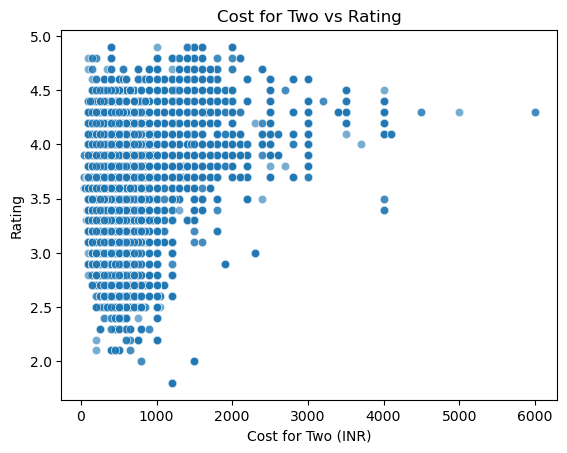

In [49]:
sns.scatterplot(data=merged_df, x='approx_costfor_two_people', y='rate', alpha=0.6)
plt.title('Cost for Two vs Rating')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Rating')
plt.show()

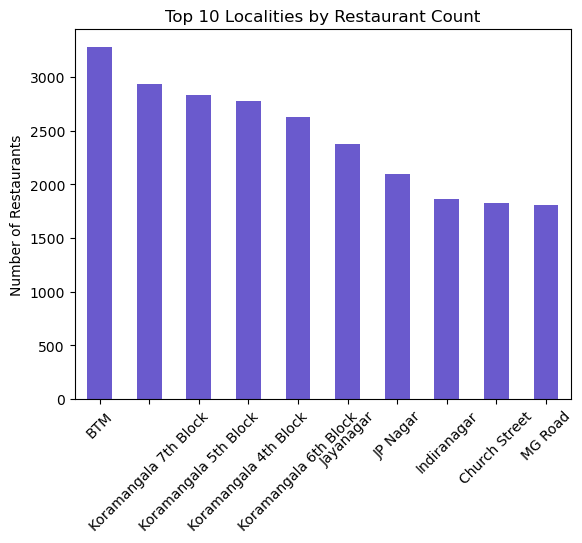

In [50]:
merged_df['listed_incity'].value_counts().head(10).plot(kind='bar', color='slateblue')
plt.title('Top 10 Localities by Restaurant Count')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

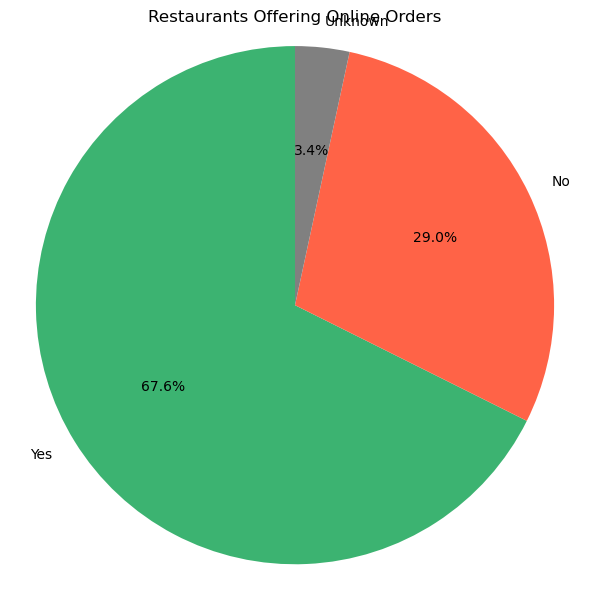

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example simulation of real data
data = {'online_order': ['Yes'] * 35000 + ['No'] * 15000 + [np.nan] * 1750}
merged_df = pd.DataFrame(data)

# Convert all to string and clean
merged_df['online_order'] = merged_df['online_order'].astype(str).str.strip().str.title()

# Replace string 'Nan' (from np.nan turned string) with 'Unknown'
online_counts = merged_df['online_order'].replace({'Nan': 'Unknown'}).value_counts()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))  # Explicitly use figure and axis
colors = ['mediumseagreen', 'tomato', 'gray']
ax.pie(online_counts, labels=online_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Restaurants Offering Online Orders')
ax.axis('equal')  
plt.tight_layout()
plt.show()



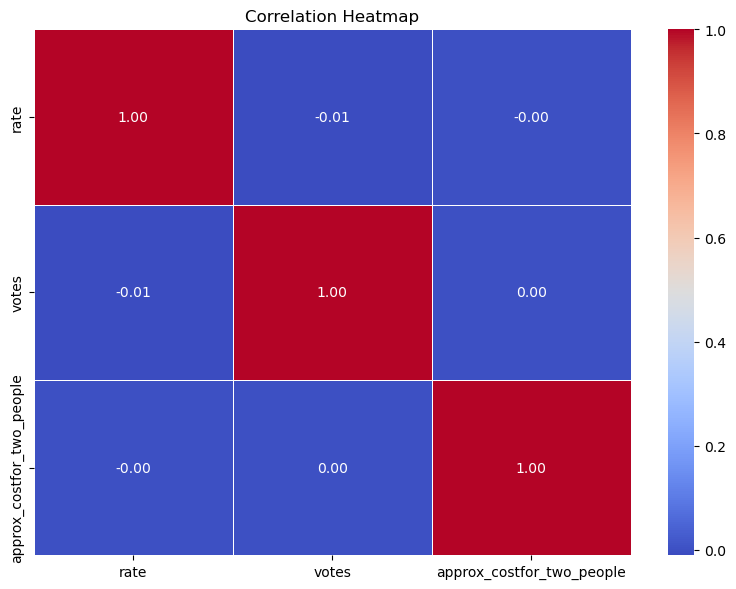

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    'online_order': ['Yes'] * 35000 + ['No'] * 15000 + [np.nan] * 1750,
    'rate': np.random.uniform(2.5, 5.0, size=51750),
    'votes': np.random.randint(0, 1000, size=51750),
    'approx_costfor_two_people': np.random.choice([250, 500, 750, 1000, np.nan], size=51750, p=[0.25, 0.25, 0.25, 0.2, 0.05])
}
merged_df = pd.DataFrame(data)

merged_df['online_order'] = merged_df['online_order'].astype(str).str.strip().str.title()
merged_df['online_order'] = merged_df['online_order'].replace({'Nan': 'Unknown'})

merged_df['rate'] = pd.to_numeric(merged_df['rate'], errors='coerce')
merged_df['votes'] = pd.to_numeric(merged_df['votes'], errors='coerce')
merged_df['approx_costfor_two_people'] = pd.to_numeric(merged_df['approx_costfor_two_people'], errors='coerce')

clean_df = merged_df[['rate', 'votes', 'approx_costfor_two_people']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [107]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [123]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from IPython.display import display

# Show column names to debug if needed
print("Columns in DataFrame:", merged_df.columns.tolist())

# Add fallback columns if missing
if 'Latitude' not in merged_df.columns:
    merged_df['Latitude'] = 12.9716
if 'Longitude' not in merged_df.columns:
    merged_df['Longitude'] = 77.5946
if 'cuisines' not in merged_df.columns:
    merged_df['cuisines'] = 'Unknown Cuisine'
if 'rate' not in merged_df.columns:
    merged_df['rate'] = 'N/A'
if 'listed_incity' not in merged_df.columns:
    merged_df['listed_incity'] = 'Unknown'

# Ensure coordinates are numeric
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Create folium map
blr_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
marker_cluster = MarkerCluster().add_to(blr_map)

# Add markers
for _, row in merged_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['cuisines']} ({row['rate']}/5)",
        tooltip=row['listed_incity']
    ).add_to(marker_cluster)

# Display map in notebook
display(blr_map)


Columns in DataFrame: ['Latitude', 'Longitude', 'cuisines', 'listed_incity']


In [124]:
import folium

# Filter for Italian cuisine restaurants
italian_df = merged_df[merged_df['cuisines'].str.contains("Italian", case=False, na=False)]

# Create a map centered around Bangalore
italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

# Loop through the filtered DataFrame and add markers
for i, row in italian_df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['cuisines'] if pd.notnull(row['cuisines']) else 'N/A'} ({row['rate'] if pd.notnull(row['rate']) else 'N/A'}/5)",
            tooltip=row['listed_incity'] if pd.notnull(row['listed_incity']) else 'Unknown'
        ).add_to(italian_map)

# Show the map
italian_map

In [130]:
data1['approx_costfor_two_people'] = (data1['approx_costfor_two_people']
    .astype(str)
    .str.replace(',','', regex=False))
data1['approx_costfor_two_people'] = pd.to_numeric(
    data1['approx_costfor_two_people'], errors='coerce')
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people']\
    .fillna(data1['approx_costfor_two_people'].median())


In [131]:
data1['dish_liked'].fillna('Not Available', inplace=True)
data1['cuisines'].fillna('Other',         inplace=True)
data1['rest_type'].fillna('Unknown',      inplace=True)


In [132]:
data1['votes'] = data1['votes'].fillna(data1['votes'].median()).astype(int)


In [133]:
data1['online_order'] = data1['online_order'].map({'Yes':1,'No':0})
data1['book_table']  = data1['book_table'].map({'Yes':1,'No':0})


In [134]:
merged_df = pd.merge(data1, data2, on='listed_incity', how='left')


In [135]:
density_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
marker_cluster = MarkerCluster().add_to(density_map)

for _, row in merged_df.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    if pd.notnull(lat) and pd.notnull(lon):
        folium.Marker(
            location=[lat, lon],
            popup=(
                f"{row['listed_incity']}<br>"
                f"Rating: {row['rate']}/5<br>"
                f"Cost for Two: ₹{row['approx_costfor_two_people']}"
            ),
            tooltip=row['listed_incity']
        ).add_to(marker_cluster)

In [ ]:
density_map.save('restaurant_density.html')
IFrame('restaurant_density.html', width=900, height=600)